In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.8.0'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [13]:
# Define path

path = r'C:\Users\User\Documents\World Happiness Report'

In [31]:
# Reading CSV file 
df = pd.read_csv(os.path.join(path,'02 Data','Original Data', 'World Happiness Report 2008 - 2023.csv'), index_col=False)

In [35]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [44]:
df = df.drop('Country name', axis=1)

KeyError: "['Country name'] not found in axis"

In [40]:
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

## 2. Create a correlation matrix heatmap (colored)

In [42]:
# Create a correlation matrix using pandas

df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.046846,0.080104,-0.043074,0.168026,0.232974,0.030864,-0.082136,0.013052,0.207642
Life Ladder,0.046846,1.000000,0.783556,0.722738,0.714927,0.538210,0.177398,-0.430485,0.515283,-0.352412
Log GDP per capita,0.080104,0.783556,1.000000,0.685329,0.819326,0.364816,-0.000766,-0.353893,0.230868,-0.260689
Social support,-0.043074,0.722738,0.685329,1.000000,0.597787,0.404131,0.065240,-0.221410,0.424524,-0.454878
Healthy life expectancy at birth,0.168026,0.714927,0.819326,0.597787,1.000000,0.375745,0.015168,-0.303130,0.217982,-0.150330
Freedom to make life choices,0.232974,0.538210,0.364816,0.404131,0.375745,1.000000,0.321396,-0.466023,0.578398,-0.278959
Generosity,0.030864,0.177398,-0.000766,0.065240,0.015168,0.321396,1.000000,-0.270004,0.300608,-0.071975
Perceptions of corruption,-0.082136,-0.430485,-0.353893,-0.221410,-0.303130,-0.466023,-0.270004,1.000000,-0.274208,0.265555
Positive affect,0.013052,0.515283,0.230868,0.424524,0.217982,0.578398,0.300608,-0.274208,1.000000,-0.334451
Negative affect,0.207642,-0.352412,-0.260689,-0.454878,-0.150330,-0.278959,-0.071975,0.265555,-0.334451,1.000000


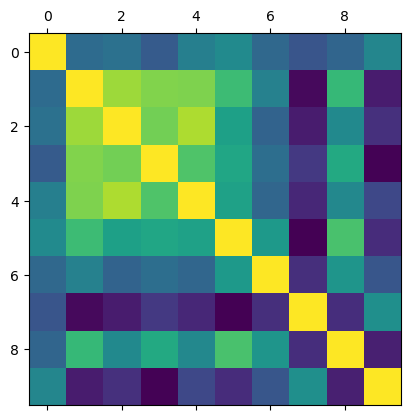

In [46]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

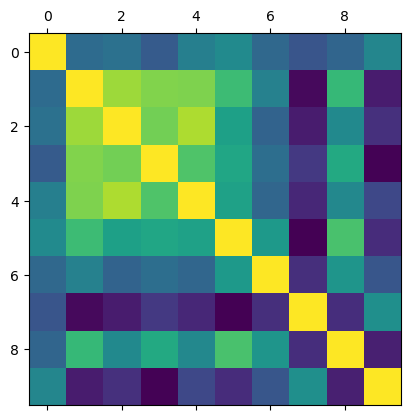

In [48]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [50]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\User\\Documents\\World Happiness Report\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

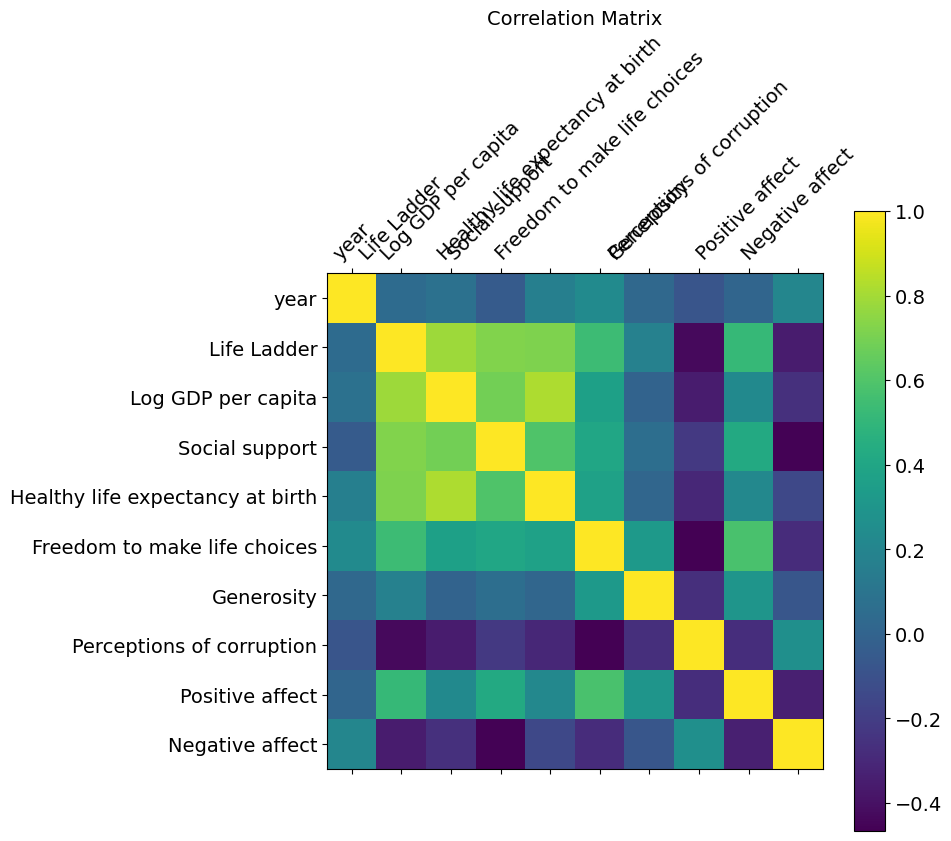

In [52]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [61]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect']]

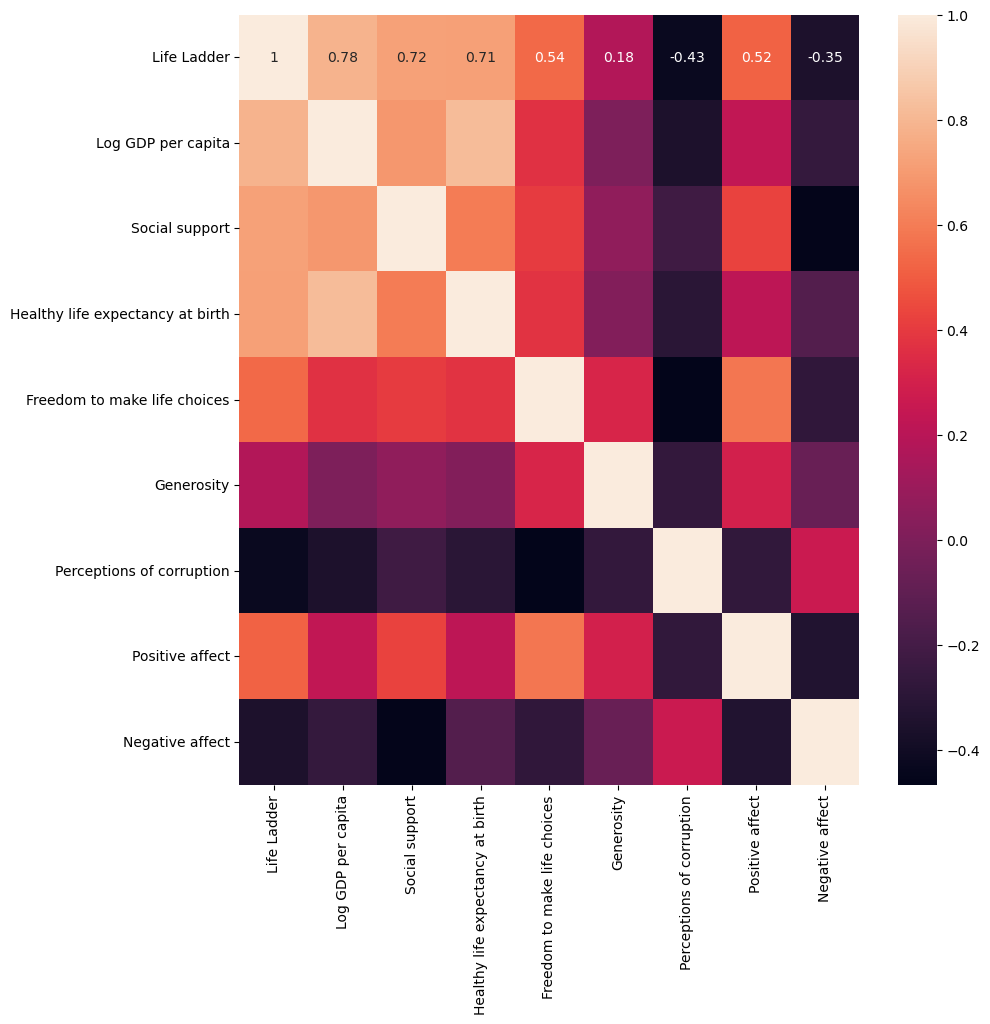

In [63]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

3 factors that affect people's perception of happiness ('Life Ladder', dependent variable) the most are as following: 
1. Log GDP per capita: Strong relationship 
2. Social suppoert: Strong relationship 
3. Healthy expectancy at birth: Strong relationship

Additionally 'Freedom to make life choices' and 'Positive effect' (ex. laugh and enjoyment) are also moderately correlated to people's perception of happiness.

### Scatterplots:

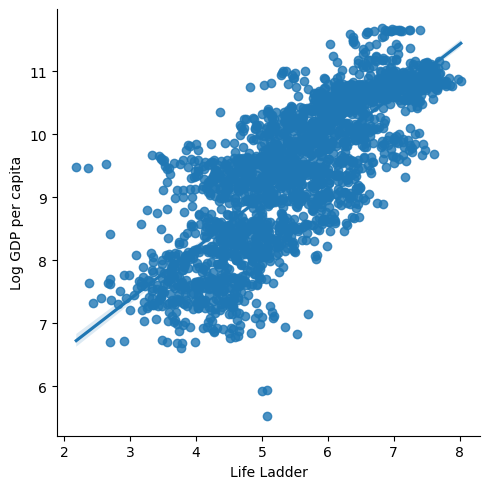

In [68]:
# Create a scatterplot for the "Life Ladder" and "Log GDP per capita" columns in seaborn

sns.lmplot(x = 'Life Ladder', y = 'Log GDP per capita', data = df)

GDP per capita has the strongest correlation with people's perception of happiness. The higher the GDP per capita is, the happier people feel, although there are some exceptions whereby people feel moderately happy (X-axis=5) even though the GDP per cpita is relatively low (Y-axis< 6). 

### Pair Plots:

In [125]:
# Keep only the variables you want to use in the pair plot

sub_2 = df[['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect','Life Ladder',
             ]]

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

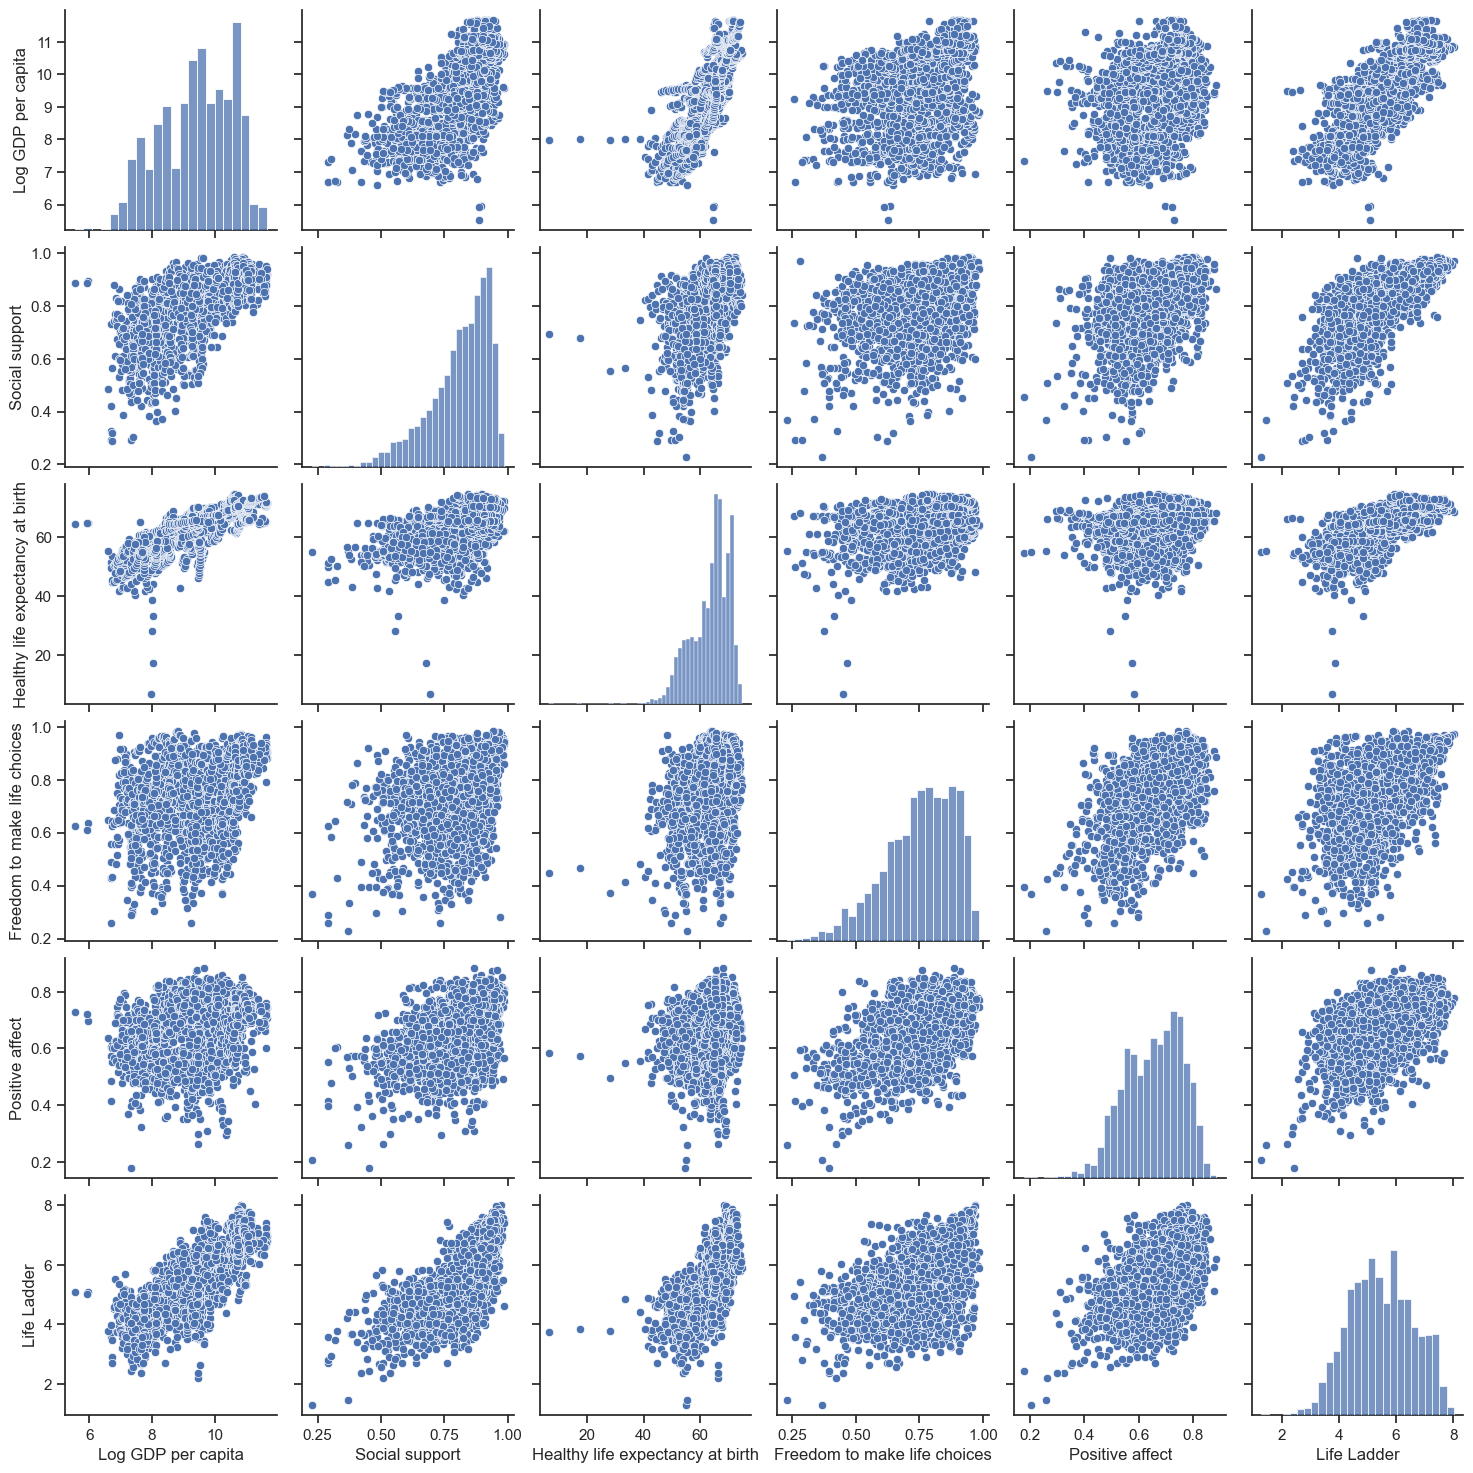

In [127]:
# Create a pair plot 

g = sns.pairplot(sub_2)

Above the pair plot charts visualizes the relationship between numtiple variables. Diagognal plots (he histograms) show distributiuon anad spread of each variables. Off diagonal plots show a scatterplot of one variable against another. They are useful identifying relationsips between variables by looking at patters, clusters and ourliners. 

### Categorical Plots:

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Ladder', ylabel='Count'>

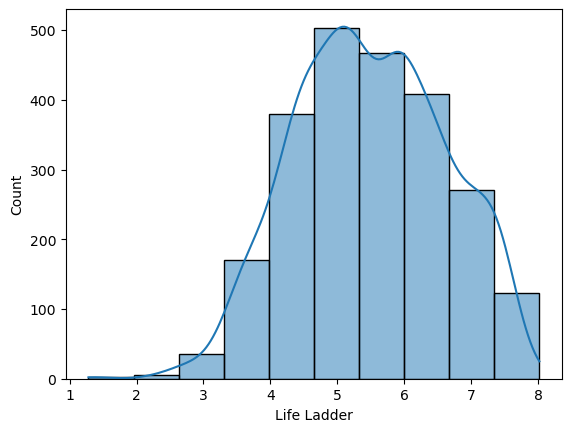

In [82]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Life Ladder'], bins = 10, kde = True)

In [88]:
df.loc[df['Life Ladder'] < 4.5, 'Happiness'] = 'Low happiness'

In [92]:
df.loc[(df['Life Ladder'] >= 4.5) & (df['Life Ladder'] < 6), 'Happiness' ] = 'Middle happiness'

In [94]:
df.loc[df['Life Ladder'] >= 6, 'Happiness'] = 'High happiness'

In [98]:
df['Life Ladder'].value_counts(dropna = False)

Life Ladder
5.252    5
6.375    4
5.104    4
5.311    4
5.304    4
        ..
4.945    1
4.972    1
4.874    1
3.603    1
3.296    1
Name: count, Length: 1814, dtype: int64

In [100]:
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Price category', 'Happiness'],
      dtype='object')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


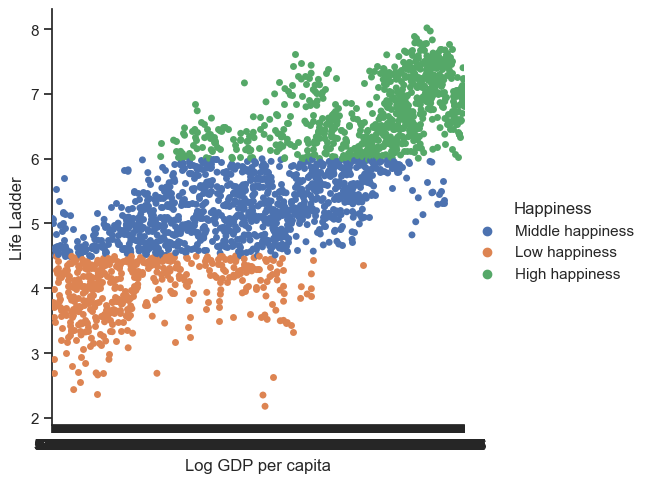

In [106]:
# Create a categorical plot in seaborn using the happinness created above

sns.set(style="ticks")
g = sns.catplot(x="Log GDP per capita", y="Life Ladder", hue="Happiness", data=df)

In [108]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

This chart visualises distribution of individual variables, cluster and outliners. It displays a positive correlation with a appearant linear line towards right top corner of the chart which means the higher the GDP per capita is, the more the poeple perceive to be happy. A few exceptions are obseved where GDP per capita is closer to medium or rather high but the happiness index is still low. 

### Hypothesis 

1.	If 'GDP per capita' and 'Social support' are the most influential factor in people's perception to happiness, would people from the developed countries with strong social welfare systems feel happier? 
2.	In a social context, an individual’s freedom to make life decisions can be bound by one's religion, political and socio-economical systems. If so, what are the countries with rather conservative and rigid political system and religion and how does such categorization correlate to people's 'freedom to make life decisions', furthermore to their happiness?
3.	'Generosity' surprisingly has the weakest correlation to people's perception to happiness. why is that?
4.	'Perception to corruption' is somehow tied to freedom of press. If so, the countries with strong censorship and/or suppress media have low 'perception to curruption' score regardless of the truth. How would people in those countrie perceive happiness?
5.	Is internet/social media penetration and people's perception correlated to people's perception of happiness?

 